In [2]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from keras import backend as clear
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_squared_error #MSE,RMSE
from sklearn.metrics import mean_absolute_percentage_error #MAPE

In [3]:
# Symmetric Mean Absolute Percentage Error (SMAPE)
def SMAPE_calulate(y_true, y_pred):
    n = len(y_true)
    SMAPE=(100 / n) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
    return SMAPE

# Relative Absolute Error (RAE)
def RAE_calculate(y_true, y_pred):
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    return RAE

# Mean Relative Absolute Error (MRAE)
def MRAE_calculate(y_true, y_pred):
    n=len(y_true)
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    MRAE=RAE/n
    return MRAE

# Median Relative Absolute Error (MdRAE) comparing with benchmark
# Note: By default, the bench value is the mean of actual value
def MdRAE_calculate(y_true, y_pred, bench=None):
    if bench==None:
        bench=np.mean(y_true)
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE,bench
    else:
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE
    
# Relative Squared Error (RSE) & Root Relative Squared Error (RRSE)
def RSE_calculate(y_true, y_pred, Root=False):
    mse = np.mean((y_true - y_pred)**2)
    denominator = np.var(y_true)
    RSE=mse/denominator
    
    if Root==True:
        return np.sqrt(RSE)
    else:
        return RSE

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/GOOG (4).csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-18,53.092999,53.497002,53.034000,53.318001,53.318001,31304000
1,2018-05-21,53.702999,54.400002,53.682499,53.979000,53.979000,20464000
2,2018-05-22,54.178001,54.329498,53.334499,53.486500,53.486500,21800000
3,2018-05-23,53.256500,54.039001,53.085499,53.984501,53.984501,21214000
4,2018-05-24,53.950001,54.023499,53.307499,53.962002,53.962002,15336000
...,...,...,...,...,...,...,...
1255,2023-05-15,116.489998,118.794998,116.480003,116.959999,116.959999,22107900
1256,2023-05-16,116.830002,121.199997,116.830002,120.089996,120.089996,32370100
1257,2023-05-17,120.180000,122.279999,119.459999,121.480003,121.480003,26659600
1258,2023-05-18,121.559998,123.900002,121.489998,123.519997,123.519997,27014500


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1260 non-null   datetime64[ns]
 1   Open       1260 non-null   float64       
 2   High       1260 non-null   float64       
 3   Low        1260 non-null   float64       
 4   Close      1260 non-null   float64       
 5   Adj Close  1260 non-null   float64       
 6   Volume     1260 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


In [6]:
new_df=df.iloc[:,[0,4]].copy()
new_df.head()

,Date,Close
0,2018-05-18,53.318001
1,2018-05-21,53.979000
2,2018-05-22,53.486500
3,2018-05-23,53.984501
4,2018-05-24,53.962002


In [7]:
new_df.describe() 

,Close
count,1260.000000
mean,89.516771
std,30.150199
min,48.811001
25%,60.555250
50%,86.767250
75%,114.176250
max,150.709000


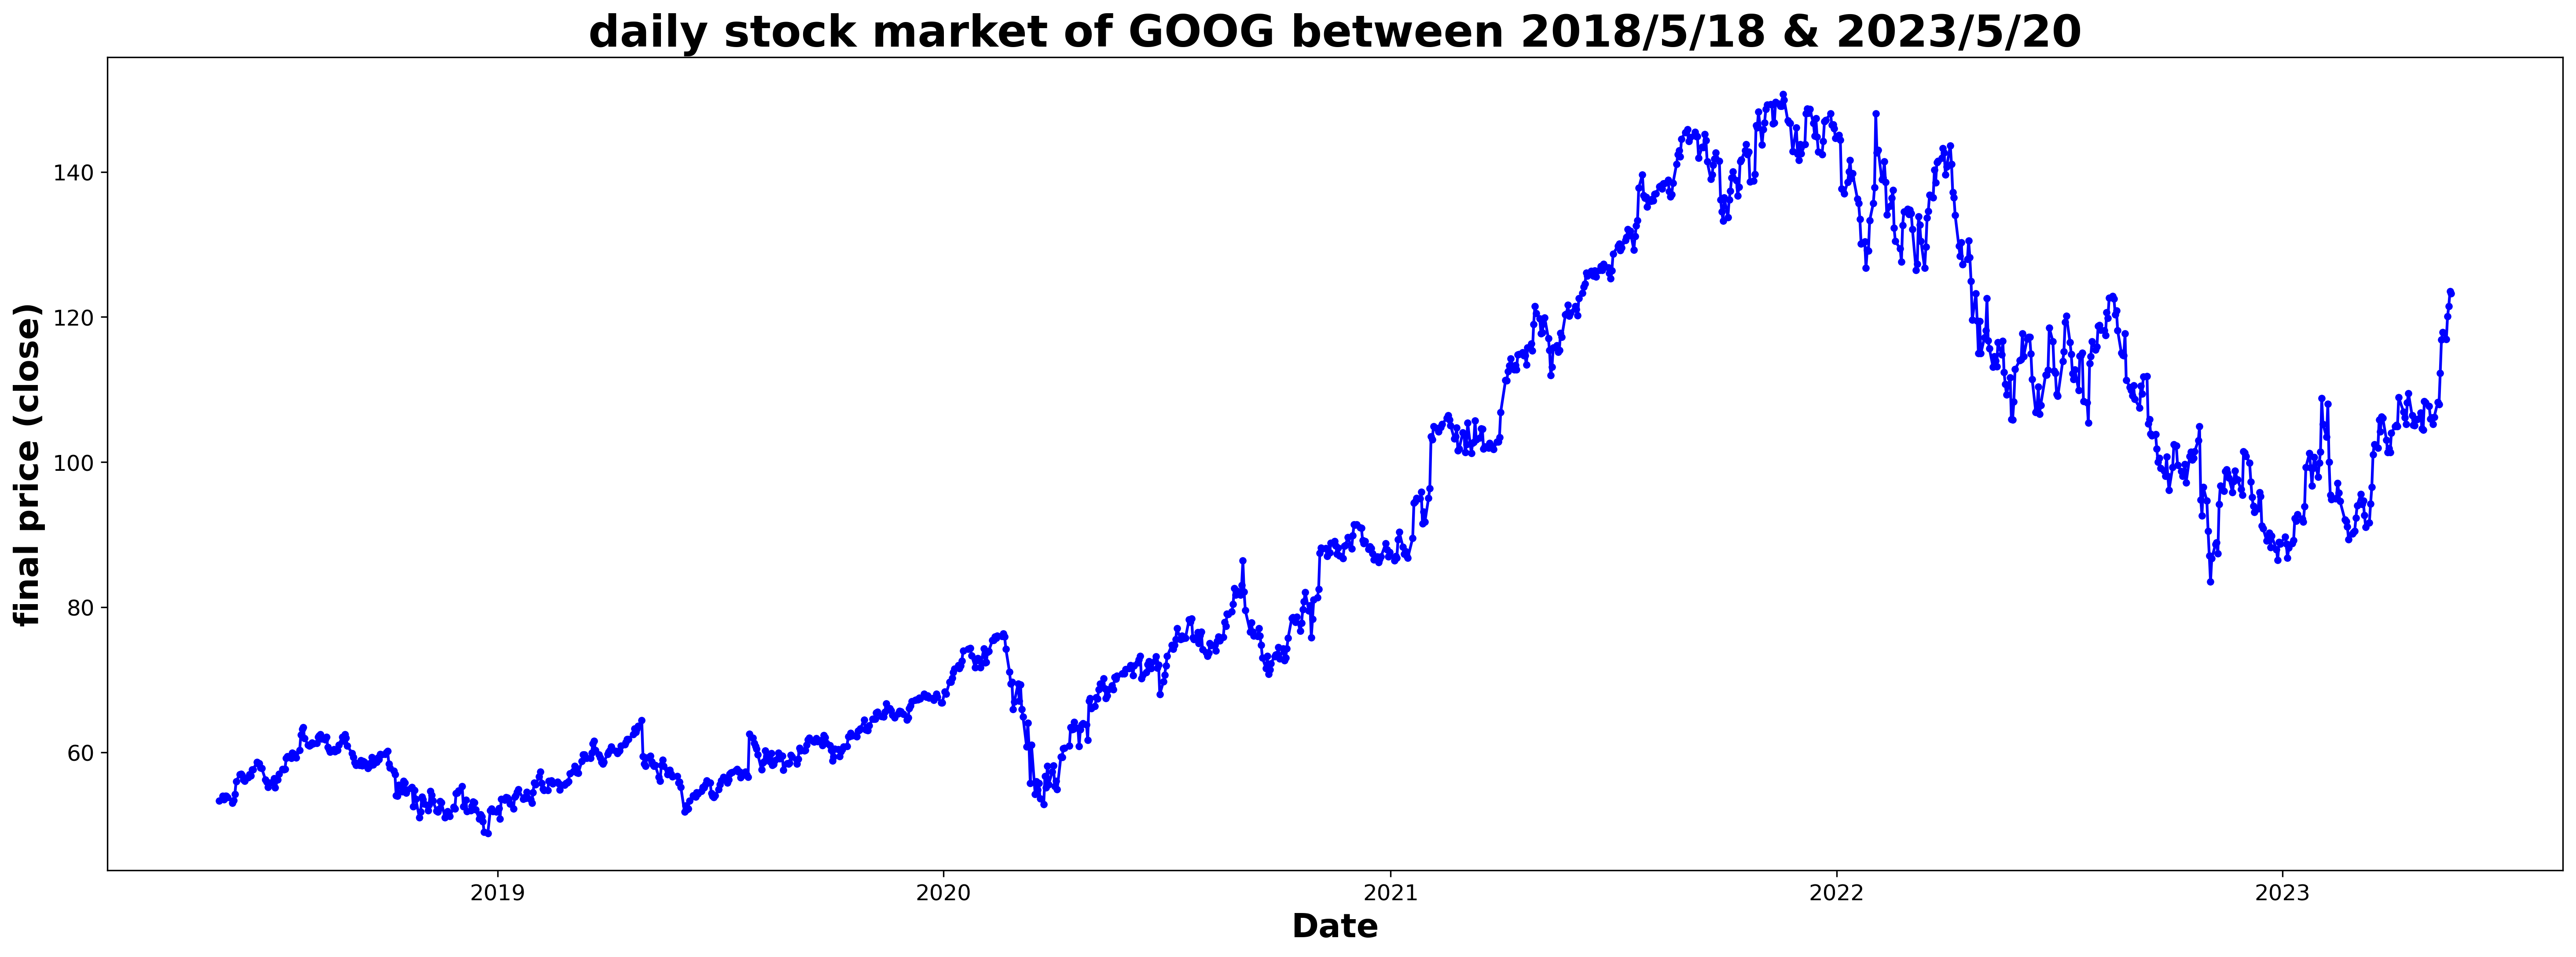

In [8]:
# Plot Y and its corresponding date
# Figure setting
plt.figure(figsize=(24,8),dpi=300)
plt.title('daily stock market of GOOG between 2018/5/18 & 2023/5/20',weight='bold',fontsize=24)
plt.xlabel('Date',fontsize=18,weight='bold')
plt.ylabel('final price (close)',fontsize=18,weight='bold')

# Actual by predicted plot
plt.plot(new_df['Date'],new_df['Close'],marker='.',color='blue')

# Set the axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [9]:
# Create 3 lags
new_df['Lag_1']=new_df['Close'].shift(1).copy()
new_df['Lag_2']=new_df['Close'].shift(2).copy()
new_df['Lag_3']=new_df['Close'].shift(3).copy()
new_df.head()

,Date,Close,Lag_1,Lag_2,Lag_3
0,2018-05-18,53.318001,NaN,NaN,NaN
1,2018-05-21,53.979000,53.318001,NaN,NaN
2,2018-05-22,53.486500,53.979000,53.318001,NaN
3,2018-05-23,53.984501,53.486500,53.979000,53.318001
4,2018-05-24,53.962002,53.984501,53.486500,53.979000


In [10]:
# Drop out missing values and rest index
clean_df=new_df.dropna(axis=0, how='any').copy()
clean_df=clean_df.reset_index(drop=True)
clean_df

,Date,Close,Lag_1,Lag_2,Lag_3
0,2018-05-23,53.984501,53.486500,53.979000,53.318001
1,2018-05-24,53.962002,53.984501,53.486500,53.979000
2,2018-05-25,53.783001,53.962002,53.984501,53.486500
3,2018-05-29,53.015999,53.783001,53.962002,53.984501
4,2018-05-30,53.389999,53.015999,53.783001,53.962002
...,...,...,...,...,...
1252,2023-05-15,116.959999,117.919998,116.900002,112.279999
1253,2023-05-16,120.089996,116.959999,117.919998,116.900002
1254,2023-05-17,121.480003,120.089996,116.959999,117.919998
1255,2023-05-18,123.519997,121.480003,120.089996,116.959999


In [11]:
# Train data
Forecast_train_data=clean_df.iloc[0:1077,:].copy()
Forecast_train_data

,Date,Close,Lag_1,Lag_2,Lag_3
0,2018-05-23,53.984501,53.486500,53.979000,53.318001
1,2018-05-24,53.962002,53.984501,53.486500,53.979000
2,2018-05-25,53.783001,53.962002,53.984501,53.486500
3,2018-05-29,53.015999,53.783001,53.962002,53.984501
4,2018-05-30,53.389999,53.015999,53.783001,53.962002
...,...,...,...,...,...
1072,2022-08-25,117.699997,114.699997,114.769997,115.070000
1073,2022-08-26,111.300003,117.699997,114.699997,114.769997
1074,2022-08-29,110.339996,111.300003,117.699997,114.699997
1075,2022-08-30,109.910004,110.339996,111.300003,117.699997


In [12]:
# Test data
Forecast_test_data=clean_df.iloc[1077:1077+180,:].copy()
Forecast_test_data

Rol_test_1=clean_df.iloc[1077:1077+180,:].copy()

In [13]:
# Rolling 1
Rol_training_1=Forecast_train_data.iloc[0:537,:].copy()
Rol_val_1=Forecast_train_data.iloc[537:537+180,:].copy()

#Rol_val_1=Forecast_train_data.iloc[0:537,:].copy()
#Rol_training_1=Forecast_train_data.iloc[537:537+180,:].copy()

# Rolling 2
Rol_training_2=Forecast_train_data.iloc[177:717,:].copy()
Rol_val_2=Forecast_train_data.iloc[717:717+180,:].copy()

#Rol_val_2=Forecast_train_data.iloc[177:717,:].copy()
#Rol_training_2=Forecast_train_data.iloc[717:717+180,:].copy()

# Rolling 3
Rol_training_3=Forecast_train_data.iloc[357:897,:].copy()
Rol_val_3=Forecast_train_data.iloc[897:897+180,:].copy()

#Rol_val_3=Forecast_train_data.iloc[357:897,:].copy()
#Rol_training_3=Forecast_train_data.iloc[897:897+180,:].copy()

In [14]:
#set x (make prediction)
# Train
x_train=Rol_training_1.drop(['Date','Close'],axis=1).copy()
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scalingT=MMscaler.fit_transform(x_train)
scaled_x_train=pd.DataFrame(data=scalingT)
scaled_x_train.columns=['Lag_1','Lag_2','Lag_3']

# Validation
x_val=Rol_val_1.drop(['Date','Close'],axis=1).copy()
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scalingV=MMscaler.fit_transform(x_val)
scaled_x_val=pd.DataFrame(data=scalingV)
scaled_x_val.columns=['Lag_1','Lag_2','Lag_3']

#set y (want to predict)
y_train=Rol_training_1['Close'].copy()
y_val=Rol_val_1['Close'].copy()


In [15]:
# Quick recap: Total of  features in the data set
scaled_x_train.head()

,Lag_1,Lag_2,Lag_3
0,0.169873,0.187767,0.163751
1,0.187967,0.169873,0.187767
2,0.187149,0.187967,0.169873
3,0.180646,0.187149,0.187967
4,0.152778,0.180646,0.187149


In [16]:
scaled_x_val.head()

,Lag_1,Lag_2,Lag_3
0,0.177437,0.134315,0.113294
1,0.134806,0.177437,0.134315
2,0.147763,0.134806,0.177437
3,0.138031,0.147763,0.134806
4,0.144145,0.138031,0.147763


In [39]:
# Tips: Using shape to call the amount of features in the data set 
input_features=scaled_x_train.shape[1]
print('Amount of features:',input_features)

Amount of features: 3


In [40]:
from keras.losses import mse
from keras.backend import sqrt

def my_RMSE(y_true, y_pred):
    return sqrt(mse(y_true, y_pred))

def my_MSE(y_true, y_pred):
    return mse(y_true, y_pred)

# Register custom object
#from keras.utils.generic_utils import get_custom_objects for pc
from tensorflow.keras.saving import get_custom_objects
get_custom_objects().update({'my_RMSE': my_RMSE})

In [189]:
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=5, input_dim=3, activation='linear'))
model.add(BatchNormalization())
model.add(Dense(units=25, activation='linear'))
# 6.5 Add output layer
model.add(Dense(units=1, activation='linear'))

# 6.6 Compile the defined Net

opt=Adam(learning_rate=0.5)
model.compile(loss='my_RMSE', optimizer=opt, metrics=['mean_absolute_percentage_error'])

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 20        
                                                                 
 batch_normalization (BatchN  (None, 5)                20        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 25)                150       
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 216
Trainable params: 206
Non-trainable params: 10
_________________________________________________________________


In [191]:
# 7.1 Store in the history for more useful information
history=model.fit(scaled_x_train, y_train, epochs=100, batch_size=128 ,verbose=1,validation_data=(scaled_x_val, y_val))

Epoch 1/100
5/5 [==============================] - 0s 34ms/step - loss: 3.4394 - mean_absolute_percentage_error: 5.5561 - val_loss: 28.3779 - val_mean_absolute_percentage_error: 32.3348
Epoch 2/100
5/5 [==============================] - 0s 14ms/step - loss: 2.5187 - mean_absolute_percentage_error: 4.0464 - val_loss: 27.2900 - val_mean_absolute_percentage_error: 31.4036
Epoch 3/100
5/5 [==============================] - 0s 14ms/step - loss: 2.4741 - mean_absolute_percentage_error: 4.0479 - val_loss: 28.9834 - val_mean_absolute_percentage_error: 33.9582
Epoch 4/100
5/5 [==============================] - 0s 18ms/step - loss: 3.0854 - mean_absolute_percentage_error: 5.2440 - val_loss: 29.7103 - val_mean_absolute_percentage_error: 34.5088
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: 3.9225 - mean_absolute_percentage_error: 6.5564 - val_loss: 23.6411 - val_mean_absolute_percentage_error: 27.1617
Epoch 6/100
5/5 [==============================] - 0s 14ms/step - loss

In [192]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error'])

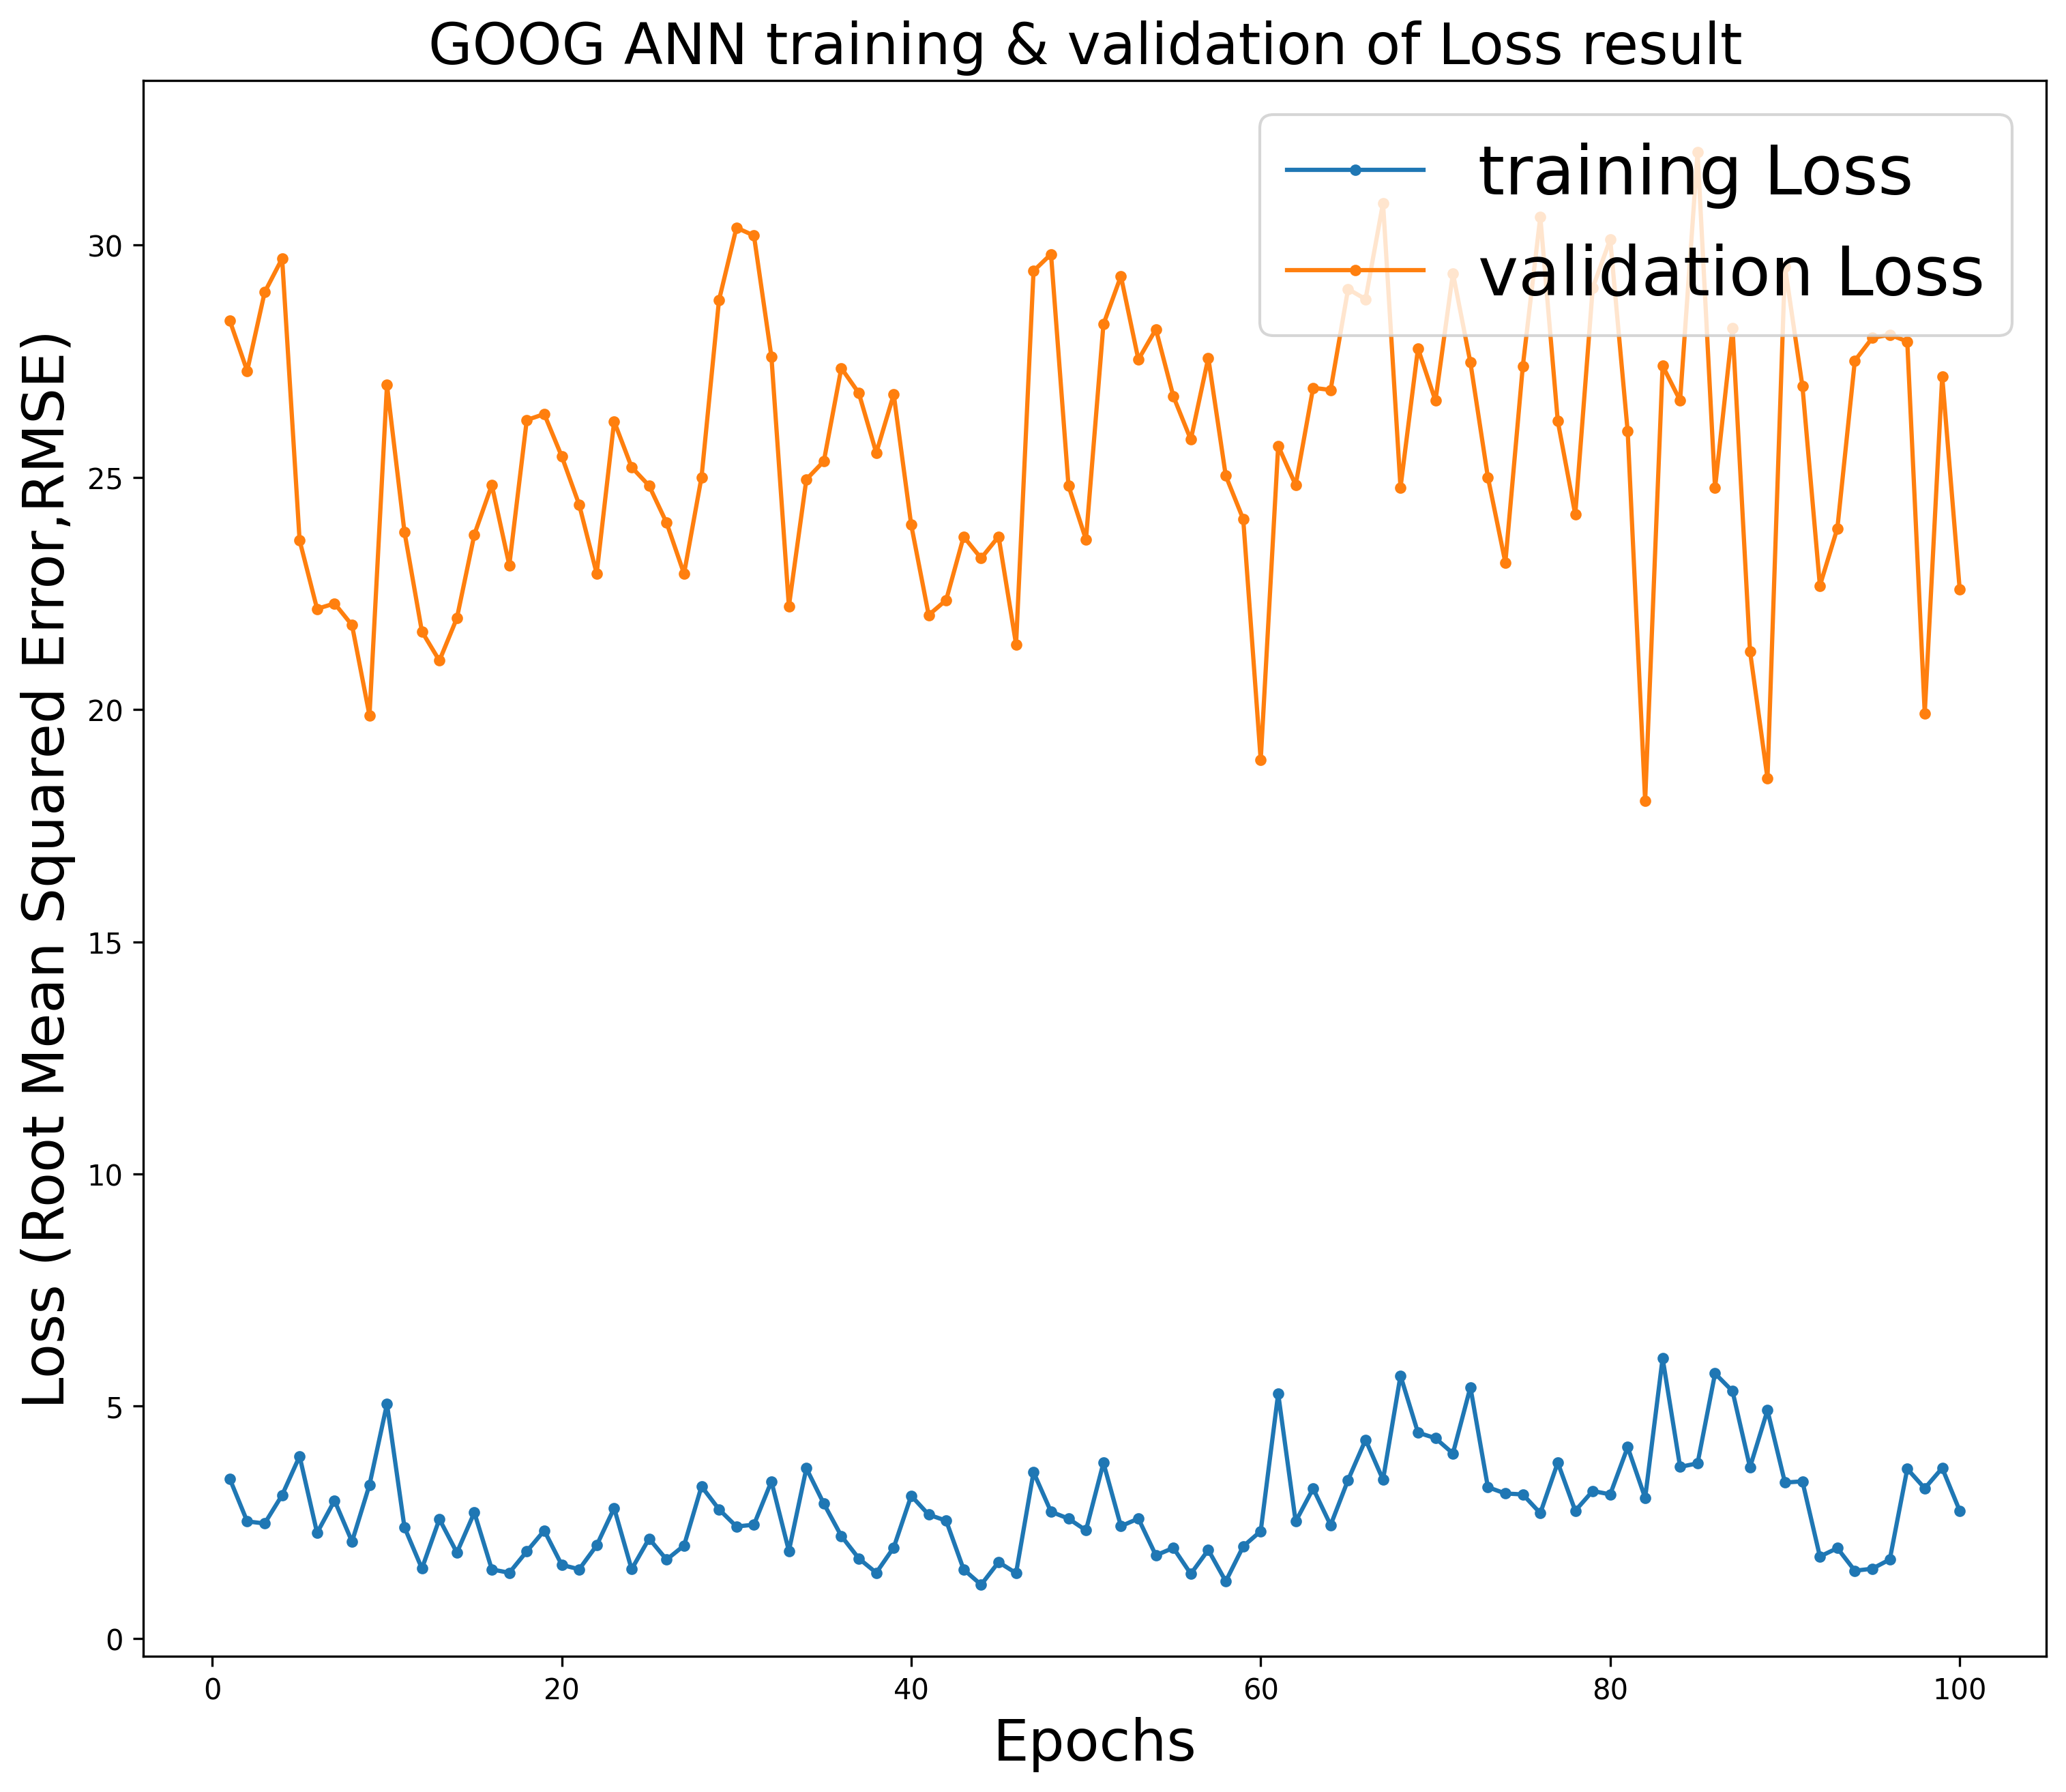

In [193]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Root Mean Squared Error,RMSE)',fontsize=20)
plt.title('GOOG ANN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

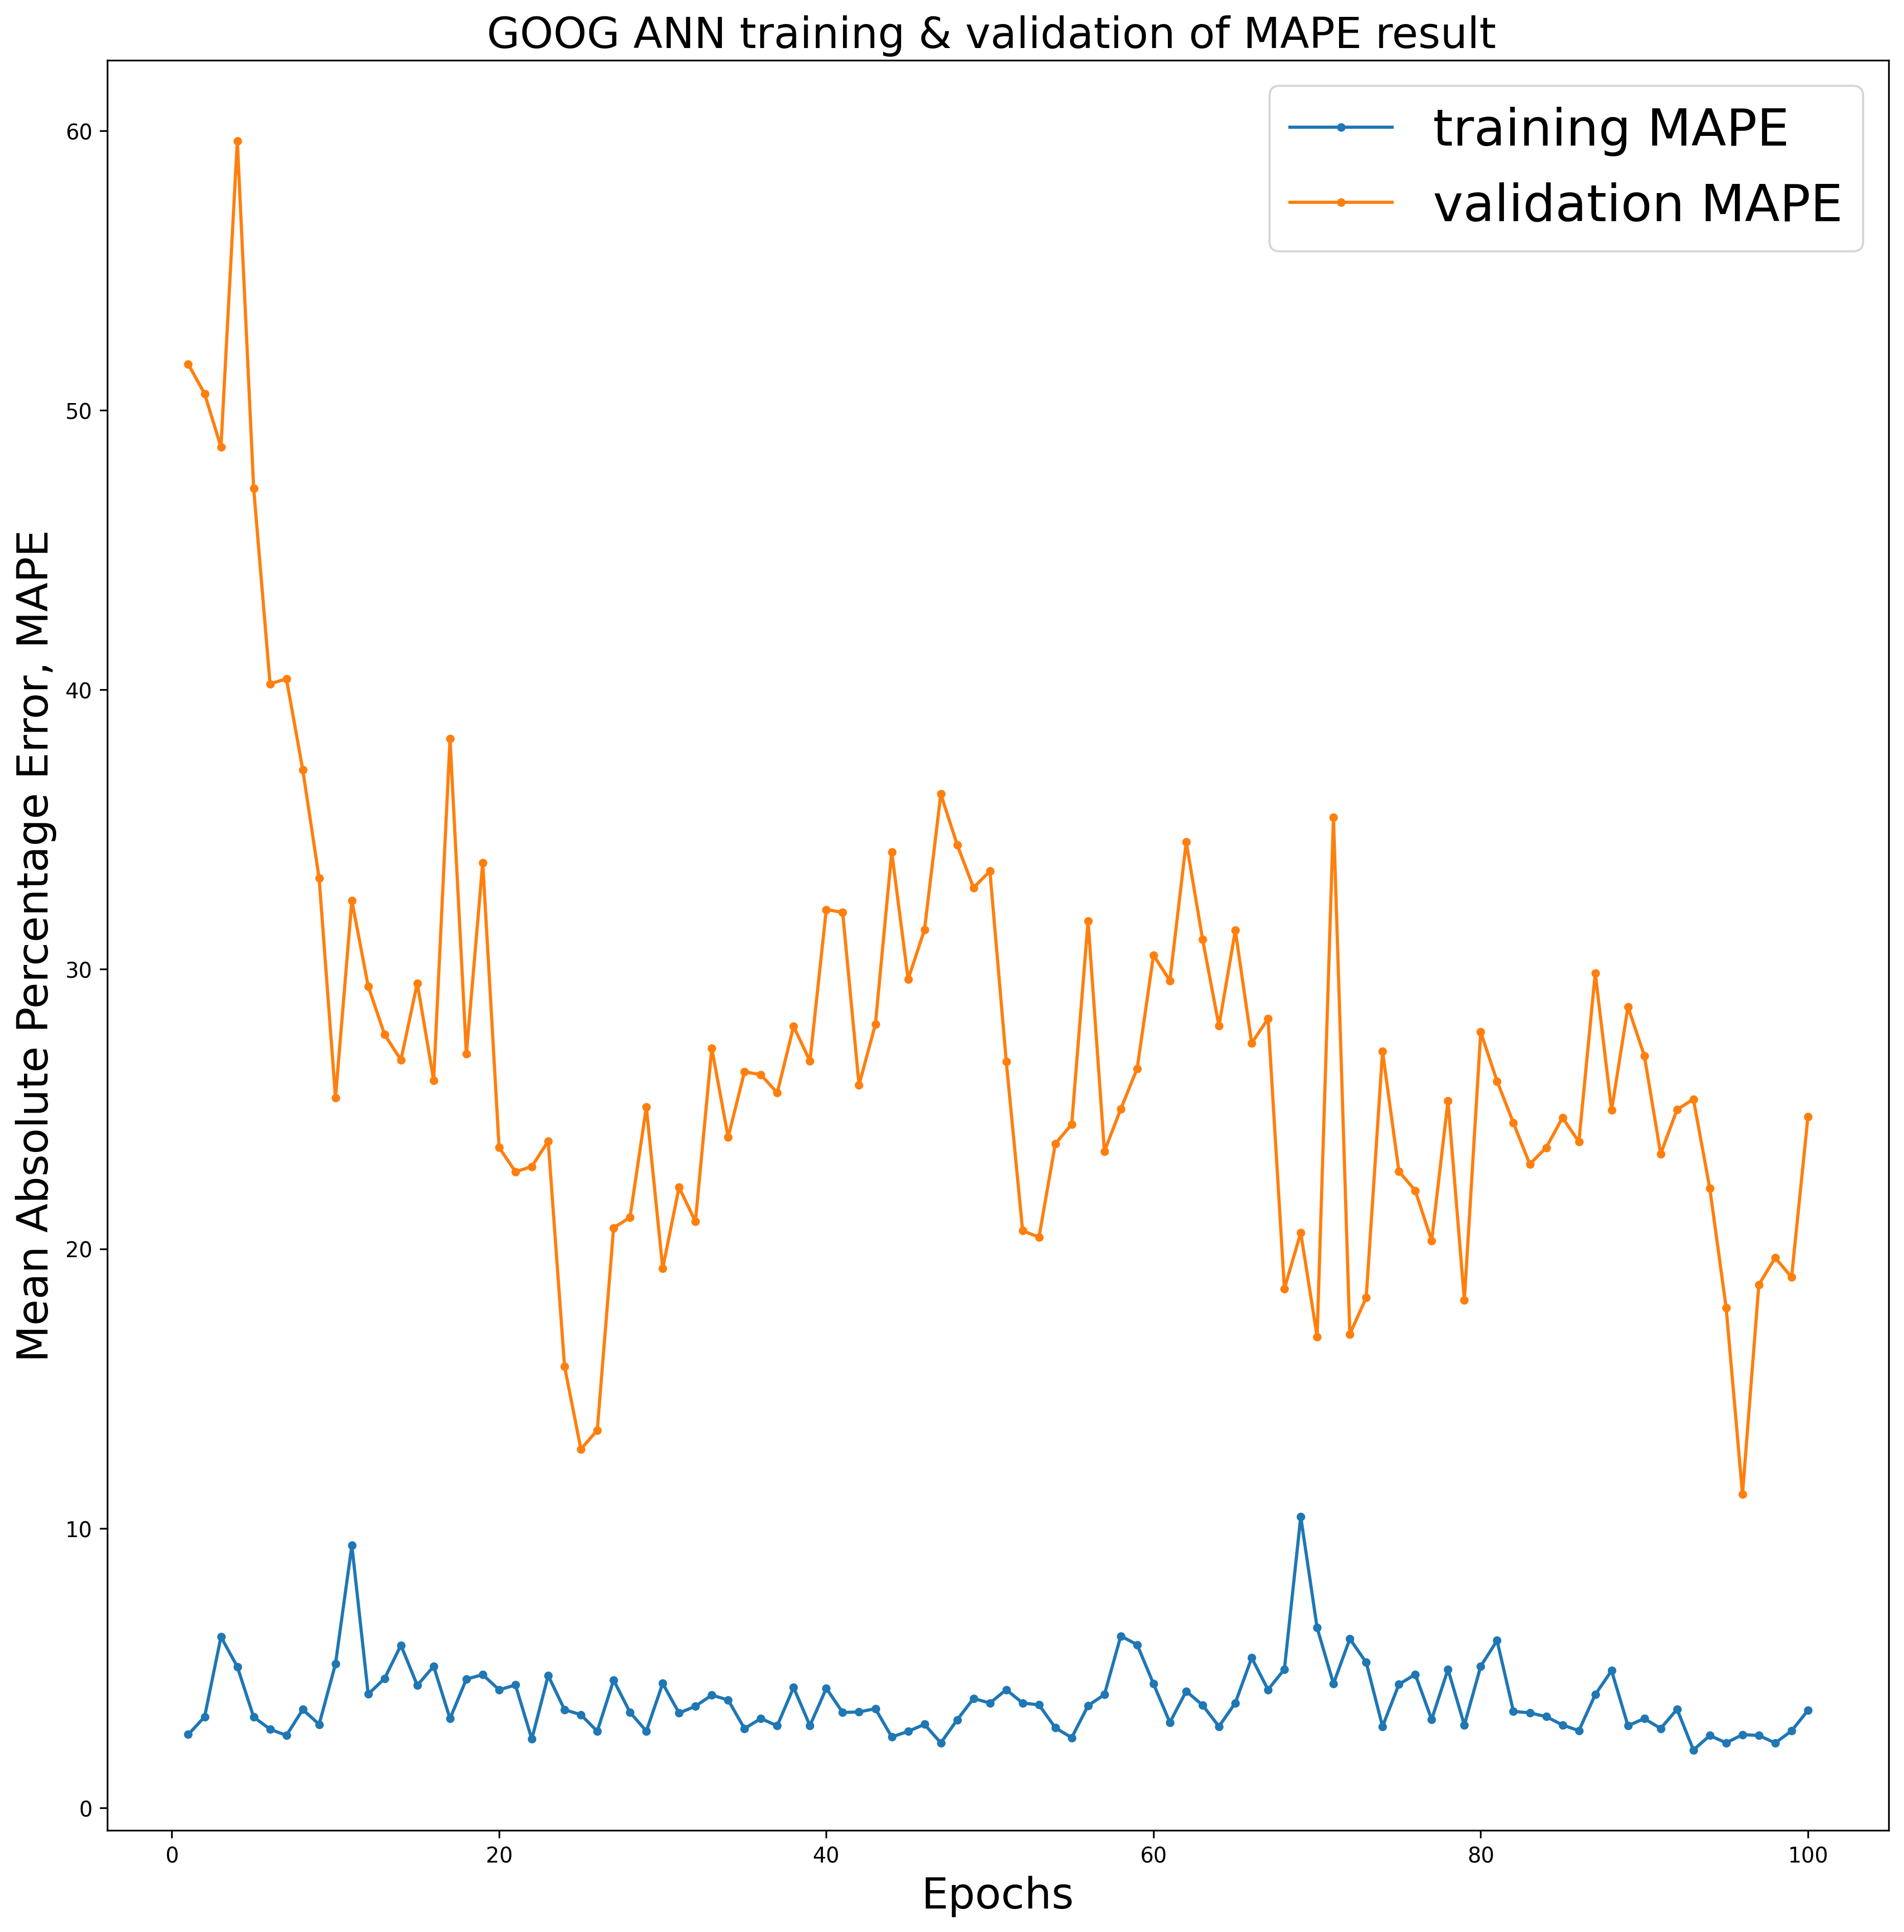

In [187]:
# 7.2 Plot the history of training and validation
training_acc_values=modeling_result['mean_absolute_percentage_error']
val_acc_values=modeling_result['val_mean_absolute_percentage_error']
epochs=range(1,len(training_acc_values)+1)

plt.figure(figsize=(15,15),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Mean Absolute Percentage Error, MAPE',fontsize=20)
plt.title('GOOG ANN training & validation of MAPE result ',fontsize=20)

plt.plot(epochs, training_acc_values,marker='.',label='training MAPE')
plt.plot(epochs, val_acc_values,marker='.',label='validation MAPE')
plt.legend(loc=1,fontsize=24)
plt.show()

In [194]:
# 7.3 Save the trained model
model.save('/content/drive/MyDrive/HW combination 2-7 .h5')
# Colab

print('Model has been saved...')

Model has been saved...


In [ ]:
#用找到最好超參數，在建model
# X all train data
x_forecast_train=Forecast_train_data.drop(['Date','Close'],axis=1).copy()
# Y all train data
y_forecast_train=Forecast_train_data['Close'].copy()

In [ ]:
# Create the model
clear.clear_session()
Fmodel=Sequential()

# Add input layer & first hidden layer
Fmodel.add(Dense(units=5, input_dim=3, activation='linear'))
Fmodel.add(BatchNormalization())
Fmodel.add(Dense(units=25, activation='linear'))
Fmodel.add(Dense(units=1, activation='linear'))



# Compile the defined Net
#opt=SGD(learning_rate=0.001,momentum=0.5)
opt=Adam(learning_rate=0.5,beta_1=0.95)
Fmodel.compile(loss='my_RMSE', optimizer=opt, metrics=['mean_absolute_percentage_error'])


# Finally check the model 
Fmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 20        
                                                                 
 batch_normalization (BatchN  (None, 5)                20        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 25)                150       
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 216
Trainable params: 206
Non-trainable params: 10
_________________________________________________________________


In [ ]:
#最後final model # Store in the history for more useful information #用整段train
history=Fmodel.fit(x_forecast_train, y_forecast_train, epochs=5, batch_size=64,verbose=1)

Epoch 1/5
17/17 [==============================] - 2s 3ms/step - loss: 31.7038 - mean_absolute_percentage_error: 38.9919
Epoch 2/5
17/17 [==============================] - 0s 3ms/step - loss: 16.3388 - mean_absolute_percentage_error: 18.2312
Epoch 3/5
17/17 [==============================] - 0s 3ms/step - loss: 9.2496 - mean_absolute_percentage_error: 10.4626
Epoch 4/5
17/17 [==============================] - 0s 3ms/step - loss: 12.9955 - mean_absolute_percentage_error: 14.8371
Epoch 5/5
17/17 [==============================] - 0s 3ms/step - loss: 14.4270 - mean_absolute_percentage_error: 16.0803


In [ ]:
# 7.4 Restore the saved model for testing
ANN_model=keras.models.load_model('/content/drive/MyDrive/HW google/GOOG_ANN_trained_model com3-10.h5')
# Colab

print('Model successfully loaded...')

Model successfully loaded...


In [ ]:
# X test
x_forecast_test=Forecast_test_data.drop(['Date','Close'],axis=1).copy()
# Y test
y_forecast_test=Forecast_test_data['Close'].copy()

#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scaling_x_forecast_test=MMscaler.fit_transform(x_forecast_test)
scaled_x_forecast_test=pd.DataFrame(data=scaling_x_forecast_test)
scaled_x_forecast_test.columns=['Lag_1','Lag_2','Lag_3']

In [ ]:
# 8.1 Make prediction 
prediction=np.round((ANN_model.predict_on_batch(scaled_x_forecast_test)),2)
pred_values=[]
for i in range(0,len(prediction)):
    value=prediction[i][0]
    pred_values.append(value)

In [ ]:
Results=pd.DataFrame({'Date':Forecast_test_data['Date'],'Y_true':Forecast_test_data['Close'],'Predict':pred_values})
Results['abs Error']=np.abs(Results['Y_true']-Results['Predict'])
Results

,Date,Y_true,Predict,abs Error
1077,2022-09-01,110.550003,99.000000,11.550003
1078,2022-09-02,108.680000,98.769997,9.910003
1079,2022-09-06,107.480003,98.800003,8.680000
1080,2022-09-07,110.480003,97.970001,12.510002
1081,2022-09-08,109.419998,97.370003,12.049995
...,...,...,...,...
1252,2023-05-15,116.959999,105.809998,11.150001
1253,2023-05-16,120.089996,107.839996,12.250000
1254,2023-05-17,121.480003,108.459999,13.020004
1255,2023-05-18,123.519997,110.209999,13.309998


In [ ]:
# 8.2 Calculating the mertics
MAE=mean_absolute_error(y_forecast_test,pred_values)
MSE=mean_squared_error(y_forecast_test,pred_values,squared=True)
RMSE=mean_squared_error(y_forecast_test,pred_values,squared=False)
MAPE=mean_absolute_percentage_error(y_forecast_test,pred_values)
SMAPE=SMAPE_calulate(y_forecast_test,pred_values)
RAE=RAE_calculate(y_forecast_test,pred_values)
MRAE=MRAE_calculate(y_forecast_test,pred_values)
MdRAE=MdRAE_calculate(y_forecast_test,pred_values)
RSE=RSE_calculate(y_forecast_test,pred_values,Root=False)
RRSE=RSE_calculate(y_forecast_test,pred_values,Root=True)

print('MAE:',round(MAE,3))
print('MSE:',round(MSE,3))
print('RMSE:',round(RMSE,3))
print('MAPE:',round(MAPE*100,3),'%')
print('SMAPE:',round(SMAPE,3),'%')
print('RAE:',round(RAE,3))
print('MRAE:',MRAE)
print('MdRAE:',round(MdRAE[0],3),'bench:',round(MdRAE[1],3))
print('RSE:',round(RSE,3))
print('RRSE:',round(RRSE,3))

MAE: 12.899
MSE: 178.076
RMSE: 13.345
MAPE: 13.045 %
SMAPE: 14.036 %
RAE: 2.103
MRAE: 0.011680859022130329
MdRAE: 2.247 bench: 99.476
RSE: 3.027
RRSE: 1.74


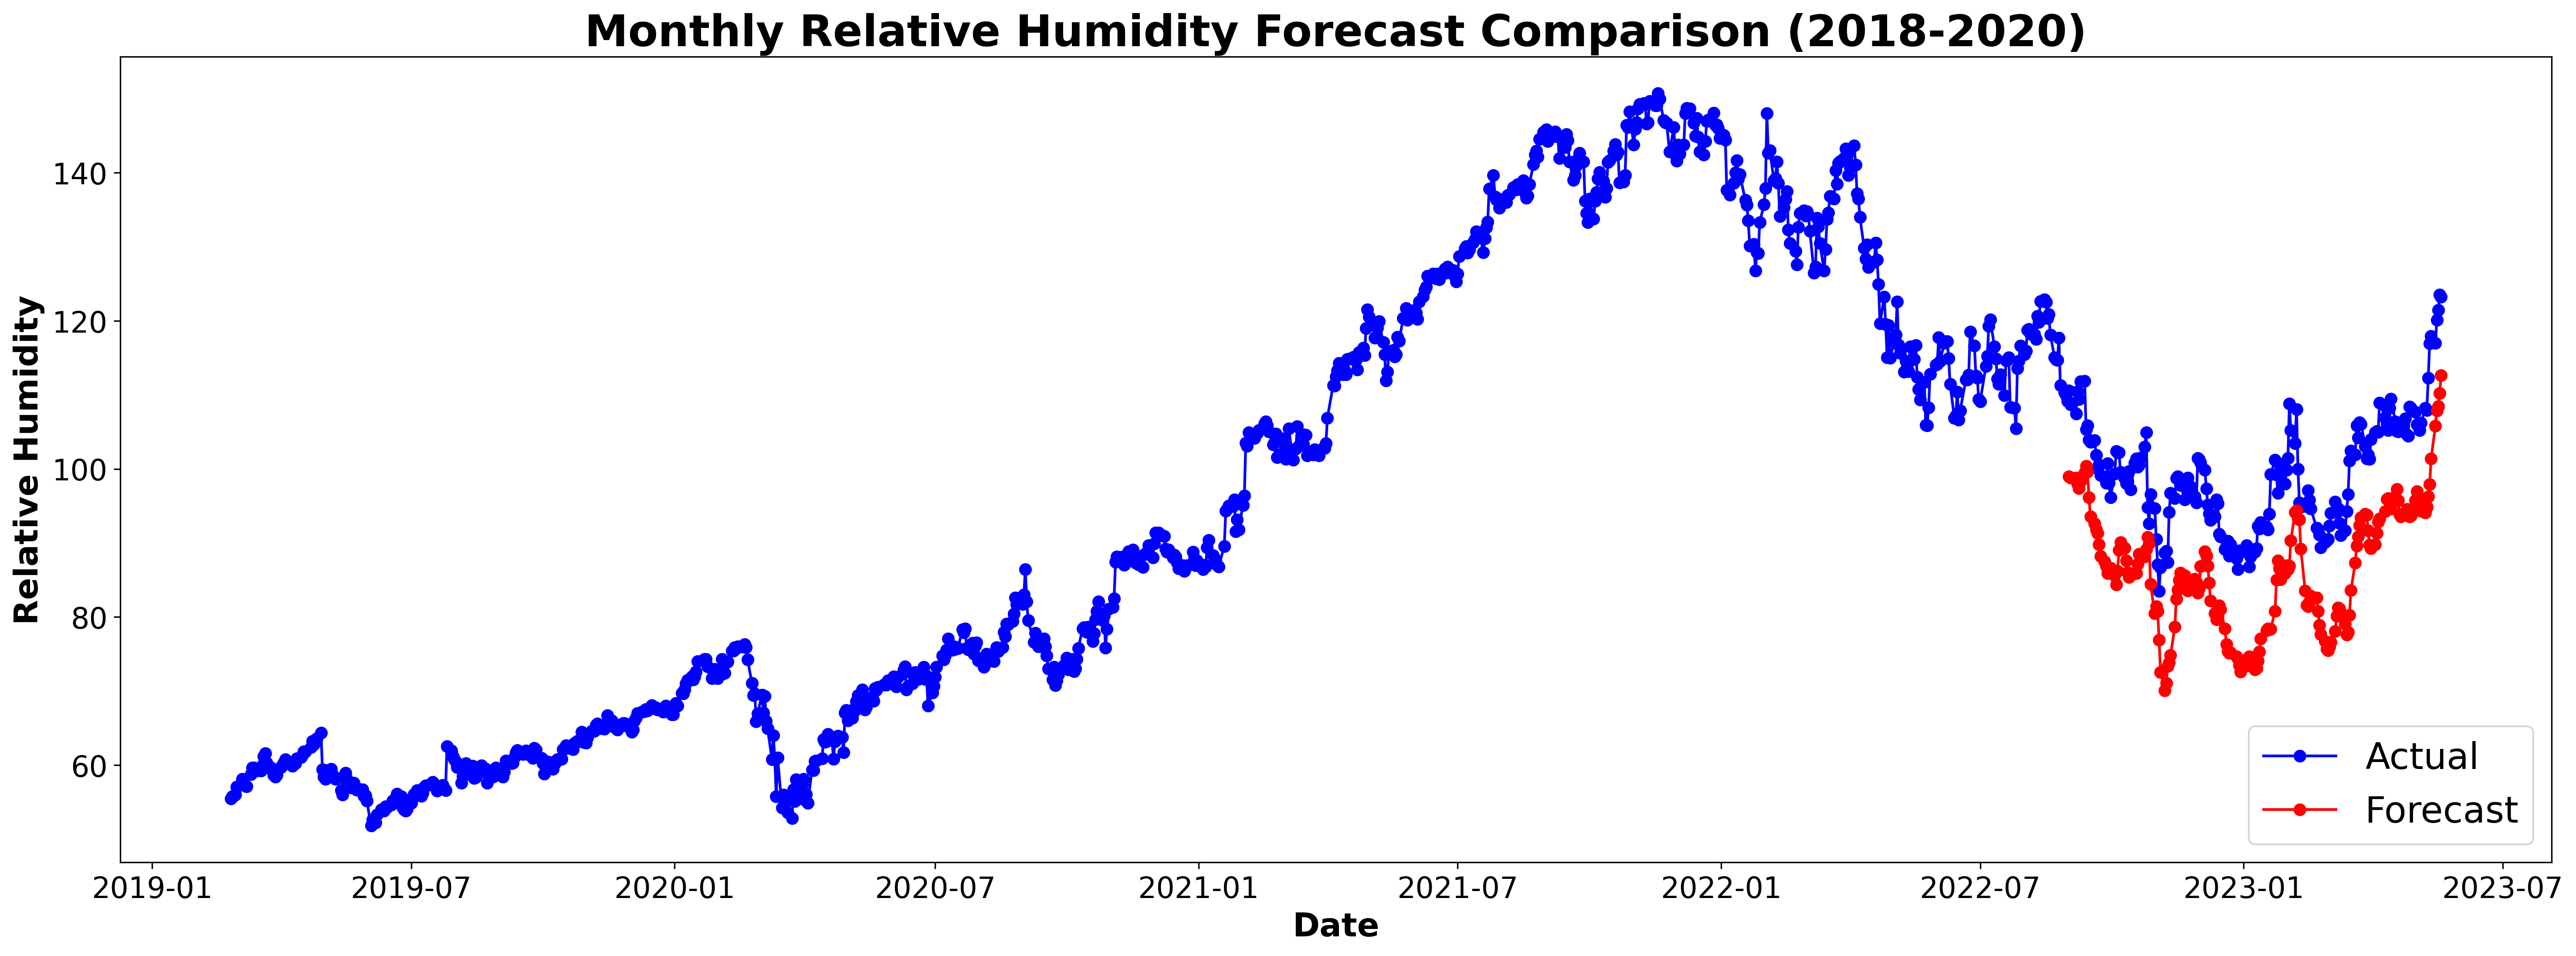

In [ ]:
# Plot Y and its corresponding date
# Figure setting
plt.figure(figsize=(24,8),dpi=300)
plt.title('Monthly Relative Humidity Forecast Comparison (2018-2020)',weight='bold',fontsize=24)
plt.xlabel('Date',fontsize=18,weight='bold')
plt.ylabel('Relative Humidity',fontsize=18,weight='bold')

# Comparison of actual value and predicted value according to Date
plt.plot(clean_df.iloc[189:,0],clean_df.iloc[189:,1],marker='o',color='blue',label='Actual')
plt.plot(Results['Date'],Results['Predict'],marker='o',color='red',label='Forecast')

# Set the axis
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Set legends
plt.legend(loc=4,fontsize=20)

plt.show()

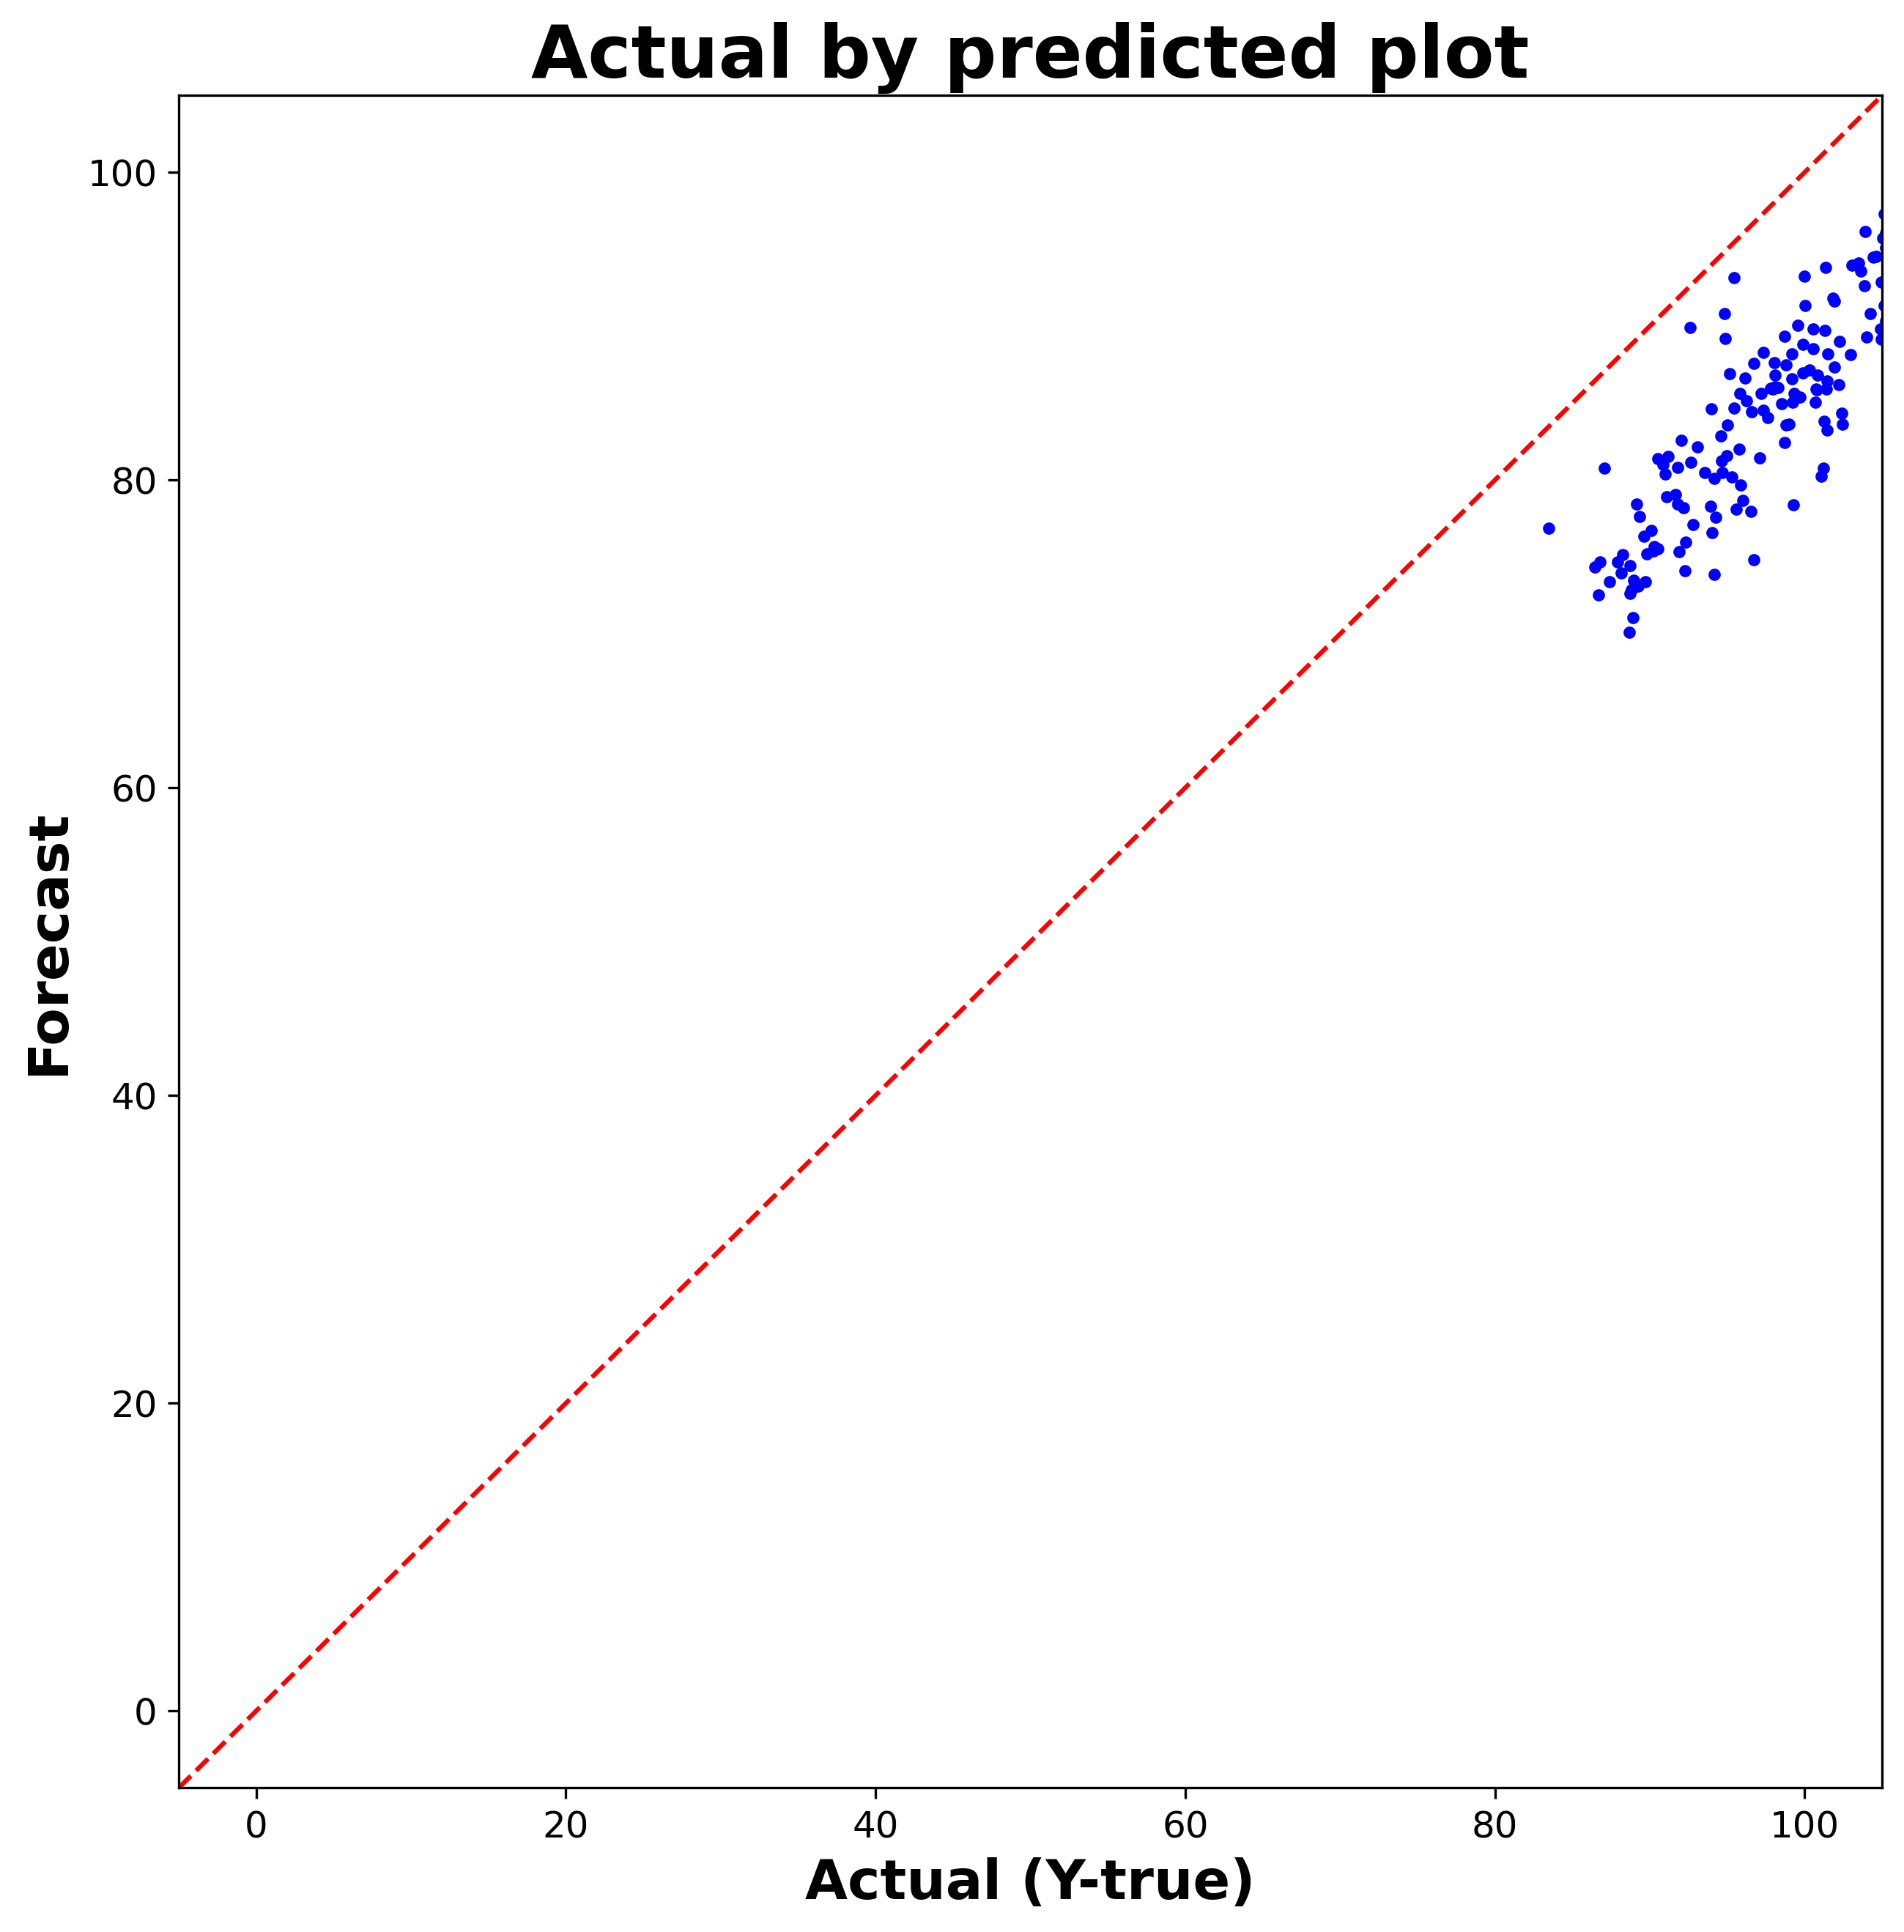

In [ ]:
# Lock the scale of axis by Y_true
max_value=100+5
min_value=0-5

# Figure setting
plt.figure(figsize=(10,10),dpi=300)
plt.title('Actual by predicted plot',weight='bold',fontsize=24)
plt.xlabel('Actual (Y-true)',fontsize=18,weight='bold')
plt.ylabel('Forecast',fontsize=18,weight='bold')

# Perfect model reference line
plt.plot([min_value,max_value], [min_value,max_value], linestyle='--',color='red')

# Actual by predicted plot
plt.scatter(Results.iloc[:,1],Results.iloc[:,2],marker='.',color='blue')

# Set the axis
plt.ylim(0-5,max_value)
plt.xlim(0-5,max_value)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()